# Flower Recognition with Image Processing and CNN

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 

In [3]:
import seaborn as sns
import cv2


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [5]:
import os
print(os.listdir("../python/Ml_project"))

['flowers', 'Project_int248.xlsx:Zone.Identifier', 'Project_int248.xlsx', 'ML_report(Flower_recognition).docx']


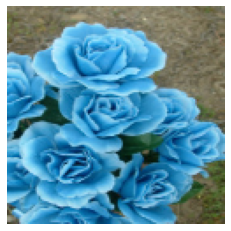

In [6]:
# plotting a random image
img = plt.imread("../python/Ml_project/flowers/flowers/rose/3550491463_3eb092054c_m.jpg")
img = cv2.resize(img,(124,124))
plt.imshow(img)
plt.axis("off")
plt.show()


# Read the data and create x and y list

In [7]:
x_ = list()
y = list()
IMG_SIZE = 128
for i in os.listdir("../python/Ml_project/flowers/flowers/daisy"):
    try:
        path = "../python/Ml_project/flowers/flowers/daisy/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(0)
    except:
        None
for i in os.listdir("../python/Ml_project/flowers/flowers/dandelion"):
    try:
        path = "../python/Ml_project/flowers/flowers/dandelion/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(1)
    except:
        None
for i in os.listdir("../python/Ml_project/flowers/flowers/rose"):
    try:
        path = "../python/Ml_project/flowers/flowers/rose/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(2)
    except:
        None
for i in os.listdir("../python/Ml_project/flowers/flowers/sunflower"):
    try:
        path = "../python/Ml_project/flowers/flowers/sunflower/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(3)
    except:
        None
for i in os.listdir("../python/Ml_project/flowers/flowers/tulip"):
    try:
        path = "../python/Ml_project/flowers/flowers/tulip/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(4)
    except:
        None
x_ = np.array(x_)

In [8]:
# Classe of images and their corresponding counts
unique_element, count=np.unique(y,return_counts=True)
for i in range(len(unique_element)):
    if(unique_element[i] == 0):
        print("Daisy     ",count[i])
    elif(unique_element[i] == 1):
        print("Dandelion ",count[i])
    elif(unique_element[i] == 2):
        print("Rose      ",count[i])
    elif(unique_element[i] == 3):
        print("Sunflower ",count[i])
    elif(unique_element[i]==4):
        print("Tulip     ",count[i])
    

Daisy      769
Dandelion  1052
Rose       784
Sunflower  734
Tulip      984


In [9]:
print("Shape of x list ",x_.shape)
print("Length of y list ",len(y))

Shape of x list  (4323, 128, 128, 3)
Length of y list  4323


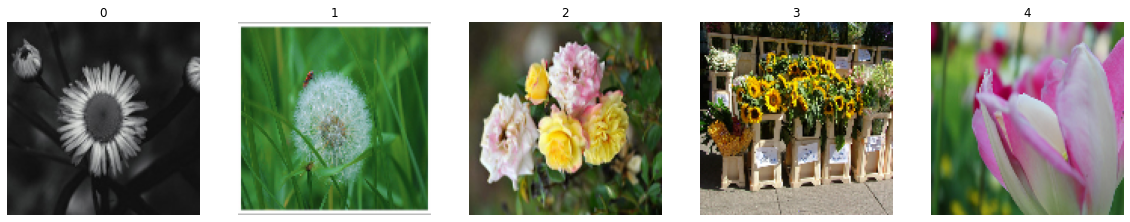

In [10]:
#plotting images
plt.figure(figsize = (20,20))
for i in range(1,6):
    img = x_[740*i]
    plt.subplot(1,5,i)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y[740*i])

# Data Preparation

In [11]:
# for replacement process i'll use keras.to_categorical 
from keras.utils.np_utils import to_categorical
y = to_categorical(y,num_classes = 5)

In [12]:
# Splitting of data int train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_,y,test_size = 0.15,random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3674, 128, 128, 3)
(649, 128, 128, 3)
(3674, 5)
(649, 5)


In [13]:
# Splitting training for validation data
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.15,random_state = 42)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(3122, 128, 128, 3)
(552, 128, 128, 3)
(3122, 5)
(552, 5)


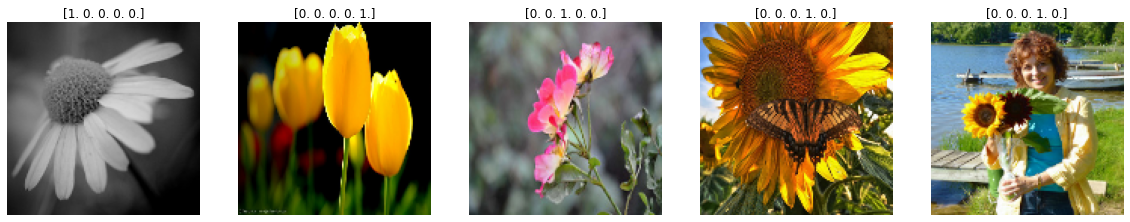

In [14]:
plt.figure(figsize = (20,20))
for i in range(5):
    img = x_train[600*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y_train[600*i])
plt.show()

In [15]:
x_train.shape

(3122, 128, 128, 3)

# Creating CNN model

In [16]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 2nd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 4th Convolutional Layer
model.add(Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 5th Convolutional Layer
model.add(Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
# Add output layer
model.add(Dense(5,activation="softmax"))

model.summary() # print summary my model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) #compile model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       5

In [17]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])


In [18]:
epoch = 52
batch_size = 60

In [19]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=60,  # randomly rotate images in the range (60, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    ) 
datagen.fit(x_train)

# Train and test the model

In [20]:
print(x_train.shape)

(3122, 128, 128, 3)


In [22]:
history = model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs= epoch,validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/52
52/52 [==============================] - 166s 3s/step - loss: 1.6581 - accuracy: 0.4353 - val_loss: 4.7750 - val_accuracy: 0.4257
Epoch 2/52
52/52 [==============================] - 168s 3s/step - loss: 1.4338 - accuracy: 0.4735 - val_loss: 6.5388 - val_accuracy: 0.3986
Epoch 3/52
52/52 [==============================] - 154s 3s/step - loss: 1.2713 - accuracy: 0.5216 - val_loss: 2.0176 - val_accuracy: 0.5091
Epoch 4/52
52/52 [==============================] - 159s 3s/step - loss: 1.1445 - accuracy: 0.5643 - val_loss: 1.3746 - val_accuracy: 0.6105
Epoch 5/52
52/52 [==============================] - 158s 3s/step - loss: 1.3445 - accuracy: 0.5000 - val_loss: 6.1588 - val_accuracy: 0.2808
Epoch 6/52
52/52 [==============================] - 155s 3s/step - loss: 1.1600 - accuracy: 0.5483 - val_loss: 1.4282 - val_accuracy: 0.5543
Epoch 7/52
52/52 [==============================] - 153s 3s/step - loss: 1.116

In [23]:
print("Test Accuracy: {0:.2f}%".format(model.evaluate(x_test,y_test)[1]*100)) #get score acording to test datas

21/21 [==============================] - 6s 293ms/step - loss: 0.8355 - accuracy: 0.6949
Test Accuracy: 69.49%


# Plotting results


In [24]:
x_ = np.array(range(len(history.history['loss']))) # get loss values from the history
trace1 = go.Scatter(
        x = x_,
        y = history.history['loss'], # get loss values from the history
        mode = "lines",
        marker = dict(color = "rgba(0,255,0,0.9)"),
        text = "Loss"
)
trace2 = go.Scatter(
        x = x_,
        y = history.history['accuracy'],# get accuracy values from the history
        mode = "lines",
        marker = dict(color = "rgba(0,0,255,0.9)"),
        text = "Accuracy"
)
data = [trace1,trace2]
layout = dict(title = "Training Accuracy and Loss")
fig = dict(data = data,layout=layout)
iplot(fig)

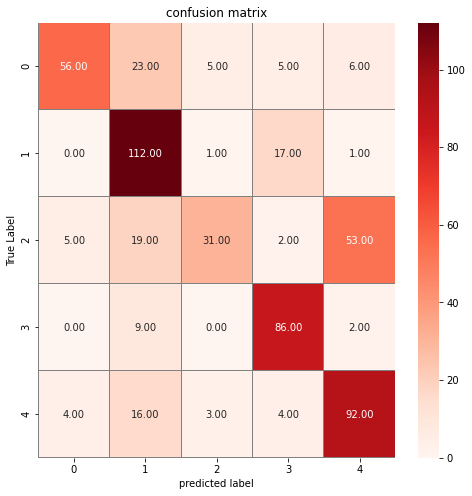

In [25]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_val,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()